In [362]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.diagnostic import acorr_ljungbox,het_arch
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from  statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error as mse
plt.style.use("seaborn-v0_8")


In [363]:
df=pd.read_excel('IPC_ BASE _100_2017.xlsx')
df.head()

,VILLE,coicop,libelle,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,...,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,année 2024,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00
0,1,,GENERAL,99.5,99.4,99.0,99.2,99.7,99.7,99.6,...,118.4,118.0,118.3,118.8,117.7,119.5,119.5,119.2,118.2,118.2
1,1,01,PRODUITS ALIMENTAIRES ET BOISSONS NON ALCOOLISEES,98.8,98.6,97.6,98.2,99.6,99.5,99.4,...,132.6,131.5,132.4,133.6,131.3,135.2,134.8,134.1,131.8,131.8
2,1,011,PRODUITS ALIMENTAIRES,98.8,98.5,97.6,98.1,99.6,99.6,99.2,...,134.1,132.9,133.9,135.1,132.7,136.8,136.4,135.6,133.3,133.3
3,1,0111,PAIN ET CEREALES,99.7,99.9,99.9,99.8,99.8,99.7,100.1,...,120.5,120.7,120.7,120.7,120.4,120.6,122.0,122.3,121.9,122.0
4,1,0112,VIANDE,99.1,98.7,97.2,98.0,100.3,100.7,101.0,...,150.2,148.0,150.0,152.8,142.6,153.0,154.0,147.4,140.1,139.5


In [364]:
city_map={
    1:'Agadir',
    2:'Casablanca',
    3:'Fes',
    4:'Kenitra',
    5:'Marrackech',
    6:'Oujda',
    7:'Rabat',
    8:'Tetouan',
    9:'Meknes',
    10:'Tanger',
    11:'Laayoune',
    12:'Dakhla',
    13:'Guelmim',
    14:'Settat',
    15:'Safi',
    16:'Beni Mellal',
    17:'Al-Houcima',
    18:'Errachidia',
    99:"National"
}

In [365]:
df['VILLE']=df['VILLE'].map(city_map)
df.head()

,VILLE,coicop,libelle,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,...,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,année 2024,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00
0,Agadir,,GENERAL,99.5,99.4,99.0,99.2,99.7,99.7,99.6,...,118.4,118.0,118.3,118.8,117.7,119.5,119.5,119.2,118.2,118.2
1,Agadir,01,PRODUITS ALIMENTAIRES ET BOISSONS NON ALCOOLISEES,98.8,98.6,97.6,98.2,99.6,99.5,99.4,...,132.6,131.5,132.4,133.6,131.3,135.2,134.8,134.1,131.8,131.8
2,Agadir,011,PRODUITS ALIMENTAIRES,98.8,98.5,97.6,98.1,99.6,99.6,99.2,...,134.1,132.9,133.9,135.1,132.7,136.8,136.4,135.6,133.3,133.3
3,Agadir,0111,PAIN ET CEREALES,99.7,99.9,99.9,99.8,99.8,99.7,100.1,...,120.5,120.7,120.7,120.7,120.4,120.6,122.0,122.3,121.9,122.0
4,Agadir,0112,VIANDE,99.1,98.7,97.2,98.0,100.3,100.7,101.0,...,150.2,148.0,150.0,152.8,142.6,153.0,154.0,147.4,140.1,139.5


In [366]:
def verify_date(col):
  try:
     pd.to_datetime(col,format="%Y-%m-%d %H:%M:%S")
     return True
  except :
     return False
     


In [367]:
date_cols=[col for col in df.columns if verify_date(col) ]
date_cols

[datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2017, 2, 1, 0, 0),
 datetime.datetime(2017, 3, 1, 0, 0),
 datetime.datetime(2017, 4, 1, 0, 0),
 datetime.datetime(2017, 5, 1, 0, 0),
 datetime.datetime(2017, 6, 1, 0, 0),
 datetime.datetime(2017, 7, 1, 0, 0),
 datetime.datetime(2017, 8, 1, 0, 0),
 datetime.datetime(2017, 9, 1, 0, 0),
 datetime.datetime(2017, 10, 1, 0, 0),
 datetime.datetime(2017, 11, 1, 0, 0),
 datetime.datetime(2017, 12, 1, 0, 0),
 datetime.datetime(2018, 1, 1, 0, 0),
 datetime.datetime(2018, 2, 1, 0, 0),
 datetime.datetime(2018, 3, 1, 0, 0),
 datetime.datetime(2018, 4, 1, 0, 0),
 datetime.datetime(2018, 5, 1, 0, 0),
 datetime.datetime(2018, 6, 1, 0, 0),
 datetime.datetime(2018, 7, 1, 0, 0),
 datetime.datetime(2018, 8, 1, 0, 0),
 datetime.datetime(2018, 9, 1, 0, 0),
 datetime.datetime(2018, 10, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 12, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 2, 1, 0, 0),
 datet

In [368]:
df_melt=df.melt(id_vars=['libelle','VILLE','coicop'],value_name='IPC',var_name="Date",value_vars=date_cols)
df_melt.head()

,libelle,VILLE,coicop,Date,IPC
0,GENERAL,Agadir,,2017-01-01 00:00:00,99.5
1,PRODUITS ALIMENTAIRES ET BOISSONS NON ALCOOLISEES,Agadir,01,2017-01-01 00:00:00,98.8
2,PRODUITS ALIMENTAIRES,Agadir,011,2017-01-01 00:00:00,98.8
3,PAIN ET CEREALES,Agadir,0111,2017-01-01 00:00:00,99.7
4,VIANDE,Agadir,0112,2017-01-01 00:00:00,99.1


In [369]:
df_pivot=df_melt.pivot_table(index='Date',columns=['VILLE','libelle'],values="IPC",sort=False)
df_pivot.head()

VILLE       Agadir                                                    \
libelle    GENERAL PRODUITS ALIMENTAIRES ET BOISSONS NON ALCOOLISEES   
Date                                                                   
2017-01-01    99.5                                              98.8   
2017-02-01    99.4                                              98.6   
2017-03-01    99.0                                              97.6   
2017-04-01    99.2                                              98.2   
2017-05-01    99.7                                              99.6   

VILLE                                                     \
libelle    PRODUITS ALIMENTAIRES PAIN ET CEREALES VIANDE   
Date                                                       
2017-01-01                  98.8             99.7   99.1   
2017-02-01                  98.5             99.9   98.7   
2017-03-01                  97.6             99.9   97.2   
2017-04-01                  98.1             99.8   98.0   
2017-05-01                  99.6             99.8  100.3   

VILLE                                                                          \
libelle    POISSON ET FRUITS DE MER LAIT, FROMAGE ET OEUFS HUILES ET GRAISSES   
Date                                                                            
2017-01-01                    101.7                  100.8               95.3   
2017-02-01                     99.7                  100.8               96.3   
2017-03-01                     98.3                  100.8               96.3   
2017-04-01                     94.5                   99.7               95.8   
2017-05-01                     98.5                  100.3               97.0   

VILLE                      ...                                   National  \
libelle    FRUITS LEGUMES  ... APPAREILS ELECTRIQUES POUR SOINS CORPORELS   
Date                       ...                                              
2017-01-01   94.0    98.3  ...                                       98.6   
2017-02-01   98.0    94.1  ...                                       98.6   
2017-03-01   97.8    89.6  ...                                       98.0   
2017-04-01  102.0    93.9  ...                                       98.0   
2017-05-01  104.4    96.4  ...                                       99.8   

VILLE                                                                   \
libelle    AUTRES APPAREILS, ARTICLES ET PRODUITS POUR SOINS CORPORELS   
Date                                                                     
2017-01-01                                              100.0            
2017-02-01                                              100.0            
2017-03-01                                              100.1            
2017-04-01                                              100.0            
2017-05-01                                              100.0            

VILLE                                                                     \
libelle    EFFETS PERSONNELS N.C.A. ARTICLES DE BIJOUTERIE ET HORLOGERIE   
Date                                                                       
2017-01-01                    100.2                                100.3   
2017-02-01                    100.0                                 99.6   
2017-03-01                    100.2                                 99.9   
2017-04-01                    100.1                                100.1   
2017-05-01                    100.1                                100.0   

VILLE                                                               \
libelle    AUTRES EFFETS PERSONNELS ASSURANCE ASSURANCE TRANSPORTS   
Date                                                                 
2017-01-01                    100.2     100.0                100.0   
2017-02-01                    100.5     100.0                100.0   
2017-03-01                    100.5     100.0                100.0   
2017-04-01                    100.0     100.0         

- IPC national

In [370]:
df_national=df_pivot['National']
df_national.head()

libelle,GENERAL,PRODUITS ALIMENTAIRES ET BOISSONS NON ALCOOLISEES,PRODUITS ALIMENTAIRES,PAIN ET CEREALES,VIANDE,POISSON ET FRUITS DE MER,"LAIT, FROMAGE ET OEUFS",HUILES ET GRAISSES,FRUITS,LEGUMES,...,APPAREILS ELECTRIQUES POUR SOINS CORPORELS,"AUTRES APPAREILS, ARTICLES ET PRODUITS POUR SOINS CORPORELS",EFFETS PERSONNELS N.C.A.,ARTICLES DE BIJOUTERIE ET HORLOGERIE,AUTRES EFFETS PERSONNELS,ASSURANCE,ASSURANCE TRANSPORTS,SERVICES FINANCIERS,COUT DES SERVICES D'INTERMEDIATION FINANCIER,AUTRES SERVICES
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,99.4,98.6,98.5,100.0,97.6,95.4,101.3,96.9,94.5,99.5,...,98.6,100.0,100.2,100.3,100.2,100.0,100.0,99.9,99.9,100.0
2017-02-01,99.5,98.8,98.7,100.2,98.2,96.7,100.8,98.2,95.4,97.9,...,98.6,100.0,100.0,99.6,100.5,100.0,100.0,99.9,99.9,100.0
2017-03-01,99.3,98.1,98.0,100.2,97.6,97.8,100.0,98.6,97.2,92.2,...,98.0,100.1,100.2,99.9,100.5,100.0,100.0,99.9,99.9,100.0
2017-04-01,99.3,98.4,98.3,99.8,98.1,95.6,100.0,98.9,100.9,92.5,...,98.0,100.0,100.1,100.1,100.0,100.0,100.0,99.8,99.8,100.0
2017-05-01,99.7,99.5,99.5,99.7,99.1,98.0,100.3,99.1,104.7,96.2,...,99.8,100.0,100.1,100.0,100.2,100.0,100.0,99.8,99.8,100.0


In [371]:
df_national=df_national['GENERAL']

In [372]:
df_nation=pd.DataFrame(df_national)
df_nation.head()

,GENERAL
Date,
2017-01-01,99.4
2017-02-01,99.5
2017-03-01,99.3
2017-04-01,99.3
2017-05-01,99.7


In [373]:
df_nation.reset_index(inplace=True)

# IPC EVOLUTION

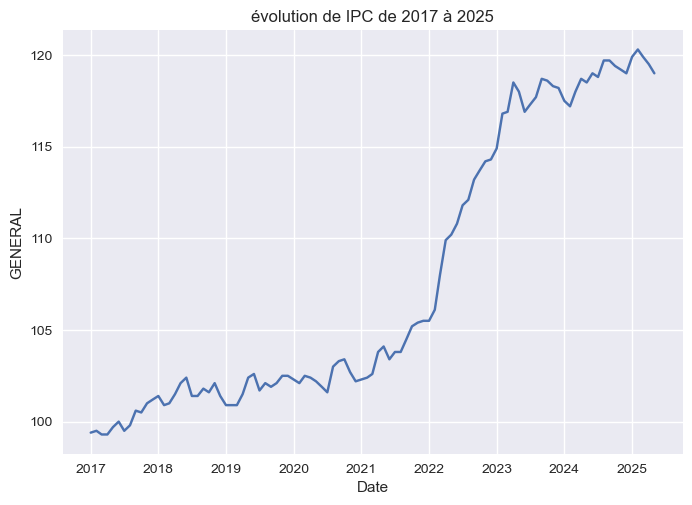

In [374]:
plt.figure()
plt.title("évolution de IPC de 2017 à 2025")
sns.lineplot(data=df_nation,x='Date',y='GENERAL')
plt.show()

## 1.SARIMA

## 1-test de stationarité:

### 1.1-AD fuller

In [375]:
def check_stationarity(df):
    result=adfuller(df)
    print("resultat du test de Dickey-Fuller:")
    print(f"t-stat:{result[0]:.3f}")
    print(f"p-value:{result[1]:.3f}")
    if result[1]>=0.05:
        print(" On accepte Ho:la série n'est pas stationaire(la serie possède racine unitaire) ")
    else:
        print("On rejette Ho:La série est stationnaire")

    

In [376]:
df_nation.set_index('Date',inplace=True)

In [377]:
check_stationarity(df_nation)

resultat du test de Dickey-Fuller:
t-stat:-0.922
p-value:0.781
 On accepte Ho:la série n'est pas stationaire(la serie possède racine unitaire) 


#### 1.2- ACF et PACF:

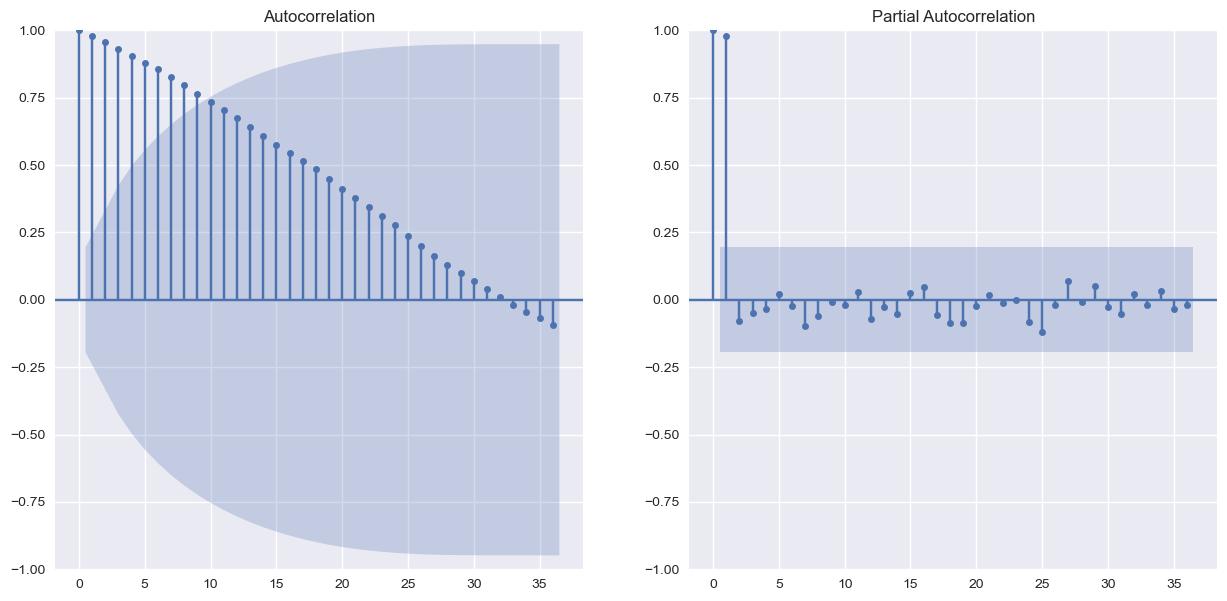

In [378]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(df_nation,lags=36,ax=ax[0])
plot_pacf(df_nation,lags=36,ax=ax[1])
plt.show()

#### 1.3- seasonal decompose

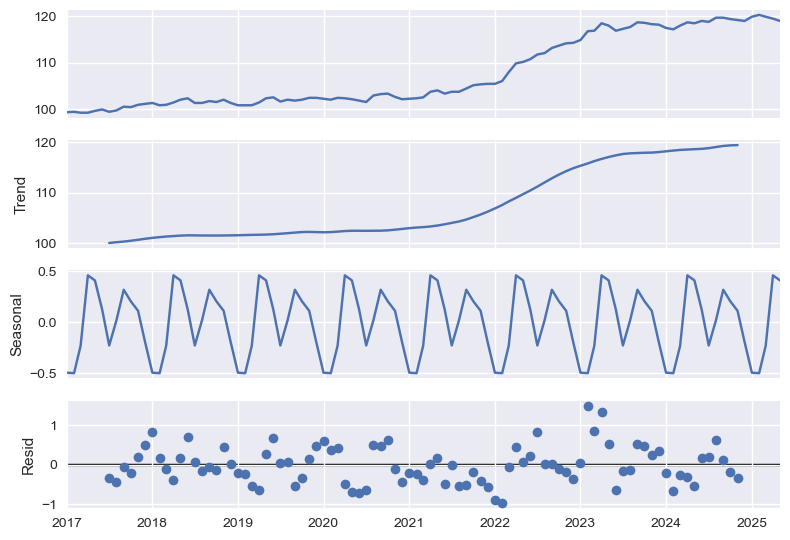

In [379]:
TSA=seasonal_decompose(df_nation).plot()

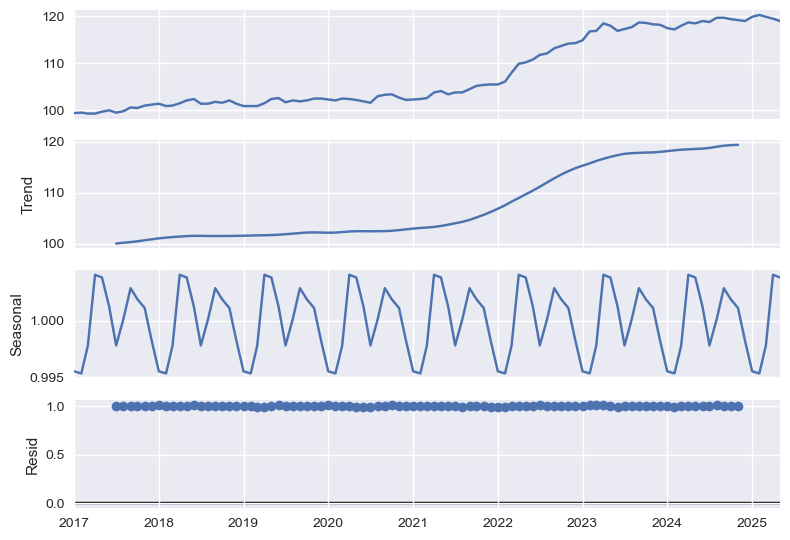

In [380]:
TSA=seasonal_decompose(df_nation,model="multiplicative").plot()

#### 1.4 premiere Difference:

<Figure size 1500x700 with 0 Axes>

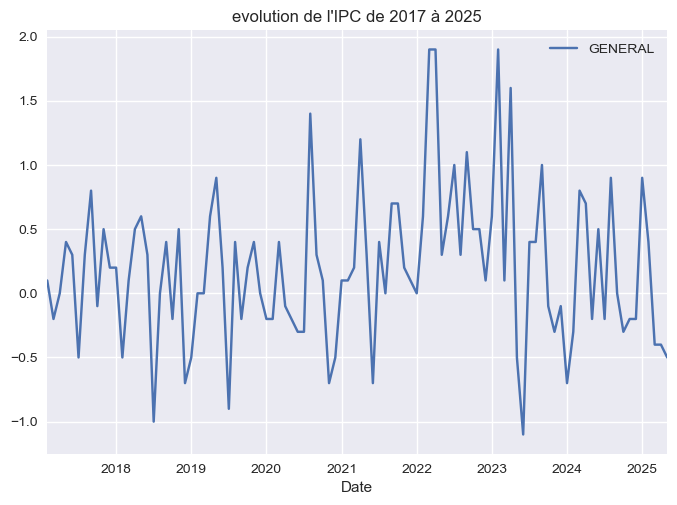

In [381]:
df_nation_diff=df_nation.diff().dropna()
plt.figure(figsize=(15,7))
df_nation_diff.plot()
plt.title("evolution de l'IPC de 2017 à 2025")
plt.grid(True)
plt.show()


#### 1.5 recheck stationarite+acf +heteroscedacite

In [382]:
check_stationarity(df_nation_diff)

resultat du test de Dickey-Fuller:
t-stat:-1.880
p-value:0.341
 On accepte Ho:la série n'est pas stationaire(la serie possède racine unitaire) 


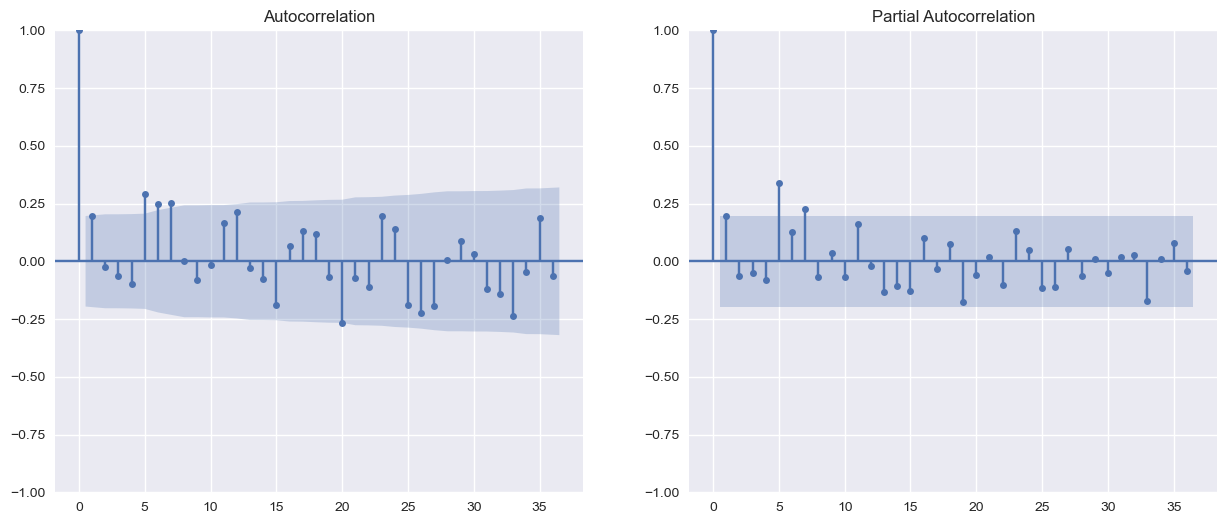

In [383]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
plot_acf(df_nation_diff,lags=36,ax=ax[0])
plot_pacf(df_nation_diff,lags=36,ax=ax[1])
plt.show()

#### 2nd differenciation:

<Figure size 800x550 with 0 Axes>

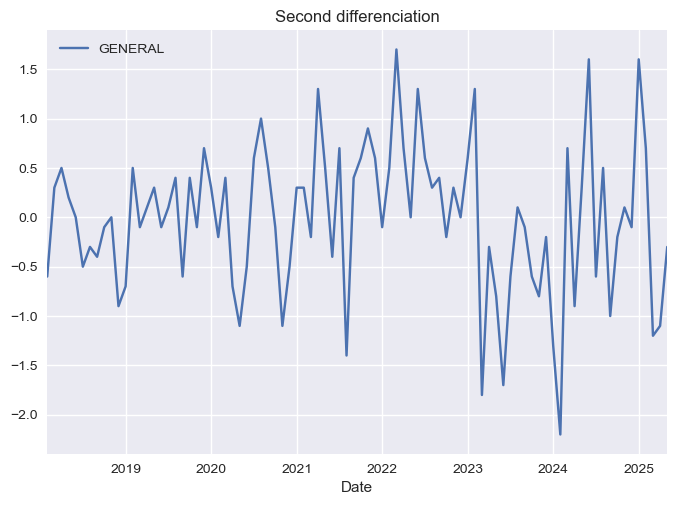

In [384]:
df_nation_diff_diff=df_nation_diff.diff(12).dropna()
plt.figure()
df_nation_diff_diff.plot()
plt.title("Second differenciation")
plt.grid(True)
plt.show()

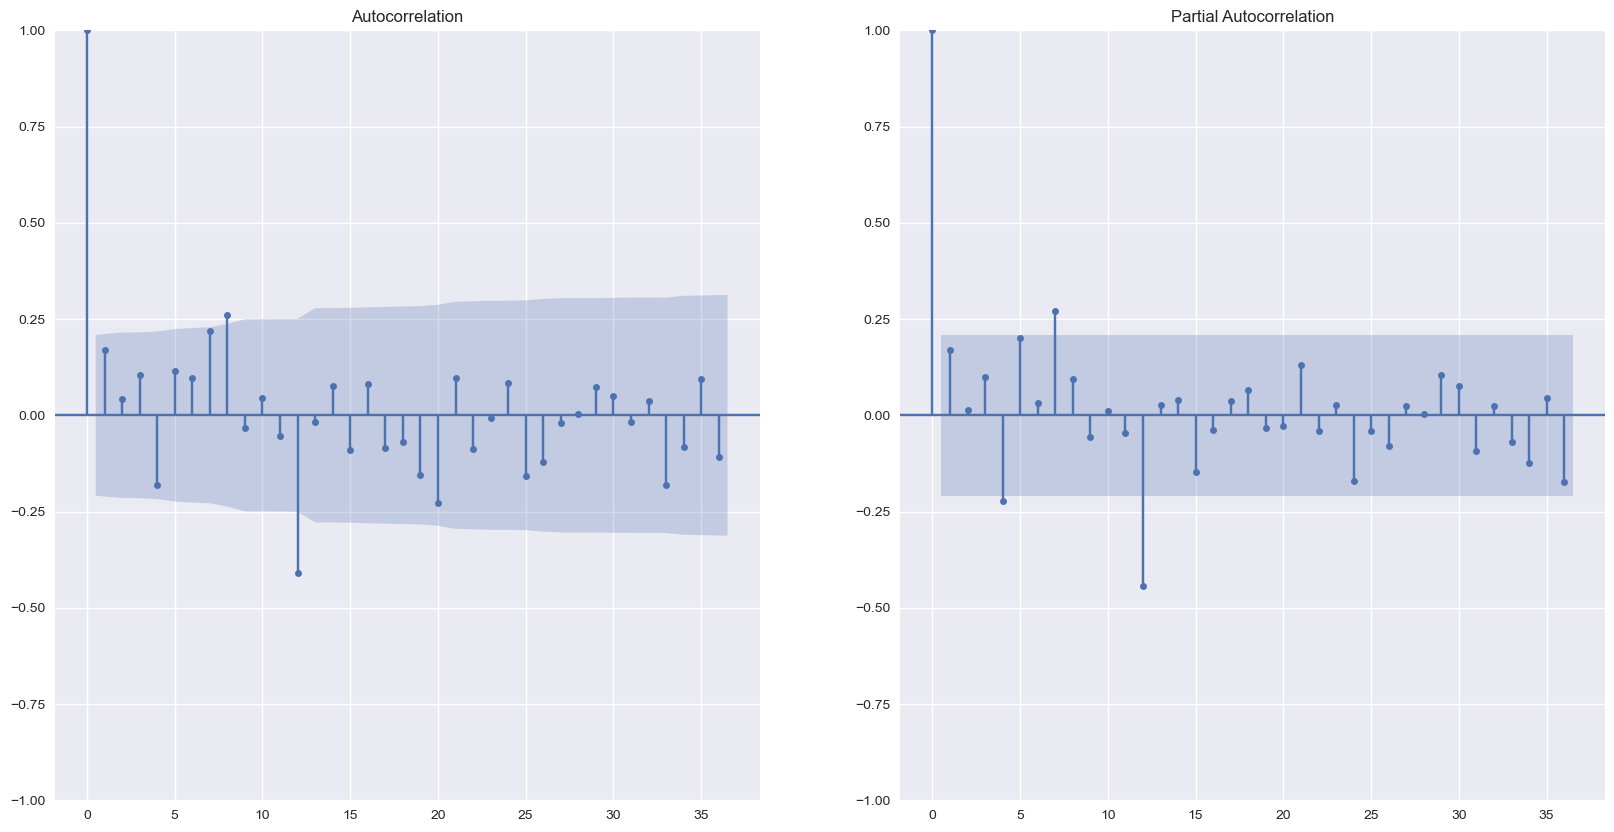

In [385]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
plot_acf(df_nation_diff_diff,lags=36,ax=ax[0])
plot_pacf(df_nation_diff_diff,lags=36,ax=ax[1])
plt.show()


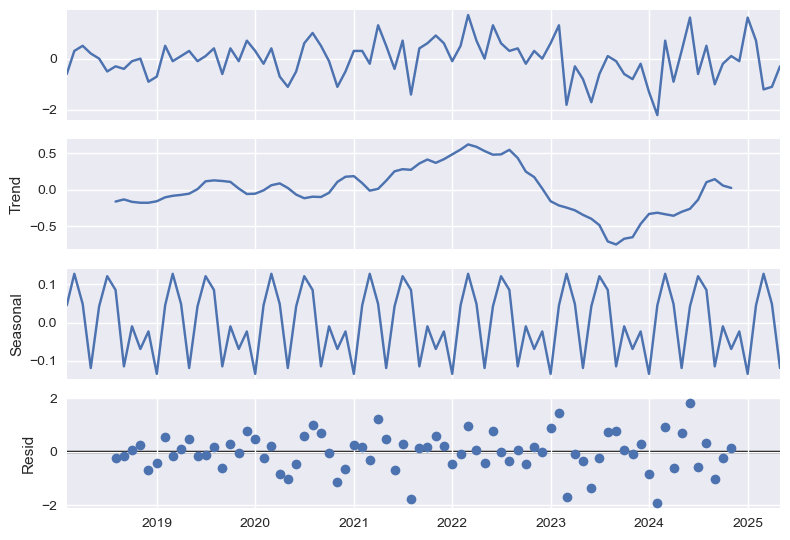

In [386]:
TSA=seasonal_decompose(df_nation_diff_diff).plot()

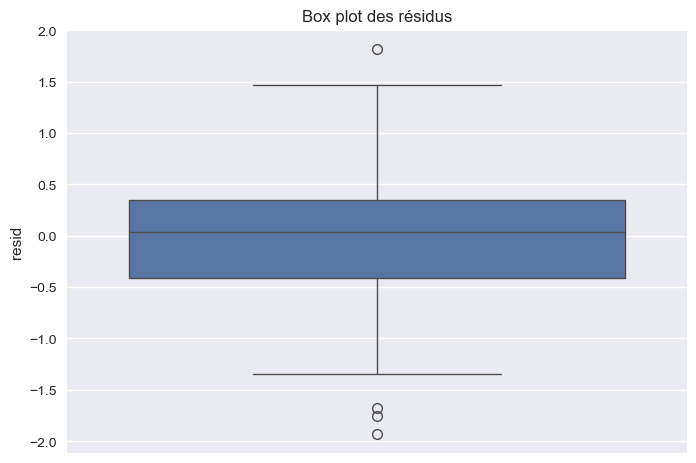

In [387]:
sns.boxplot(data=seasonal_decompose(df_nation_diff_diff).resid)
plt.title("Box plot des résidus")
plt.show()

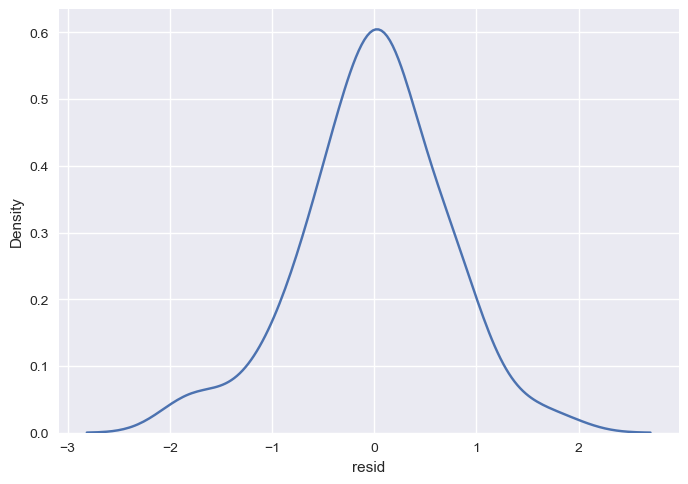

In [388]:
sns.kdeplot(data=seasonal_decompose(df_nation_diff_diff).resid)
plt.show()

In [389]:
check_stationarity(df_nation_diff_diff)

resultat du test de Dickey-Fuller:
t-stat:-3.259
p-value:0.017
On rejette Ho:La série est stationnaire


### 2-test and train test:model training

#### 2.1 splitting

In [390]:
train_size=int(0.8*len(df_nation_diff_diff))
print(f"taille de l'echantillon:{len(df_nation_diff_diff)}")
print(f"train size:{train_size}")
train,test=df_nation_diff_diff.iloc[:train_size],df_nation_diff_diff.iloc[train_size:]
print(f"training set:{train[:5]}")
print(f"testing set:{test[:5]}")

taille de l'echantillon:88
train size:70
training set:                 GENERAL
Date                    
2018-02-01 -6.000000e-01
2018-03-01  3.000000e-01
2018-04-01  5.000000e-01
2018-05-01  2.000000e-01
2018-06-01  1.421085e-14
testing set:            GENERAL
Date               
2023-12-01     -0.2
2024-01-01     -1.3
2024-02-01     -2.2
2024-03-01      0.7
2024-04-01     -0.9


#### 2.2-model training:

In [391]:
model=SARIMAX(train["GENERAL"],order=(2,1,1),seasonal_order=(2,1,1,12))
model_fit=model.fit()
print(model_fit.summary())

/opt/anaconda3/envs/datas/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22118D+00    |proj g|=  3.79443D-01

At iterate    5    f=  1.02135D+00    |proj g|=  1.17325D-01

At iterate   10    f=  1.01152D+00    |proj g|=  4.42228D-02

At iterate   15    f=  1.00115D+00    |proj g|=  6.38144D-03

At iterate   20    f=  1.00066D+00    |proj g|=  2.41250D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     30      1     0     0   2.619D-06   1.001D+00
  F =   1.0006638539517692     

CONVERG

### 3.Visualization:

In [392]:
last_date = train.index[-1]
print("last date:",last_date)
print("first date of test set:",test.index[0])

last date: 2023-11-01 00:00:00
first date of test set: 2023-12-01 00:00:00


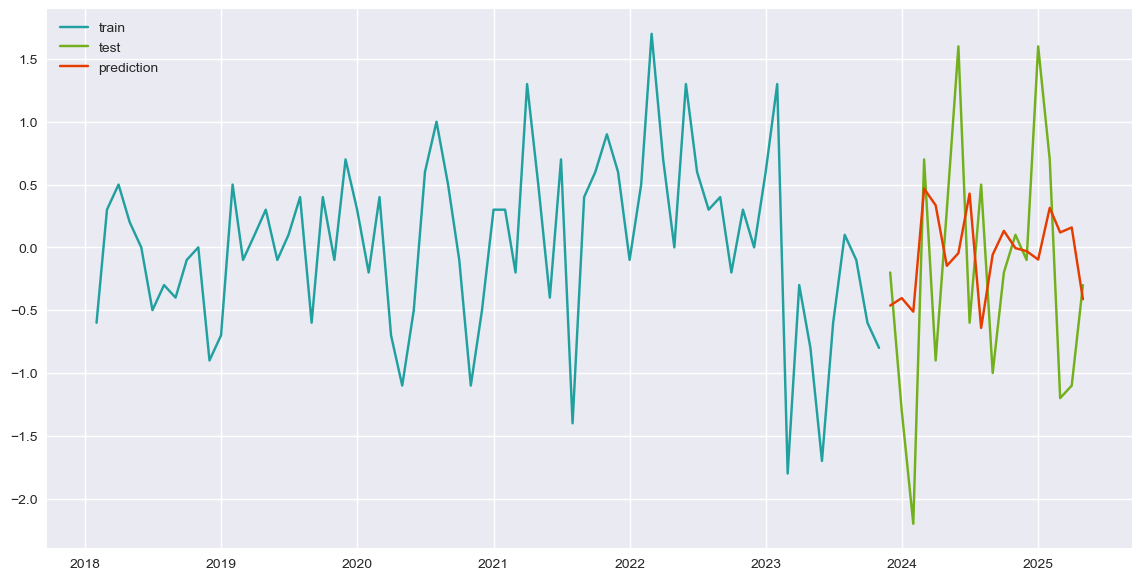

In [393]:
forecast=model_fit.forecast(steps=len(test))
plt.figure(figsize=(14,7))
plt.plot(train.index,train["GENERAL"],label="train",color="#21A0A0")
plt.plot(test.index,test["GENERAL"],label="test",color="#72B01D")
plt.plot(test.index,forecast,label="prediction",color="#E53D00")
plt.legend()
plt.show()

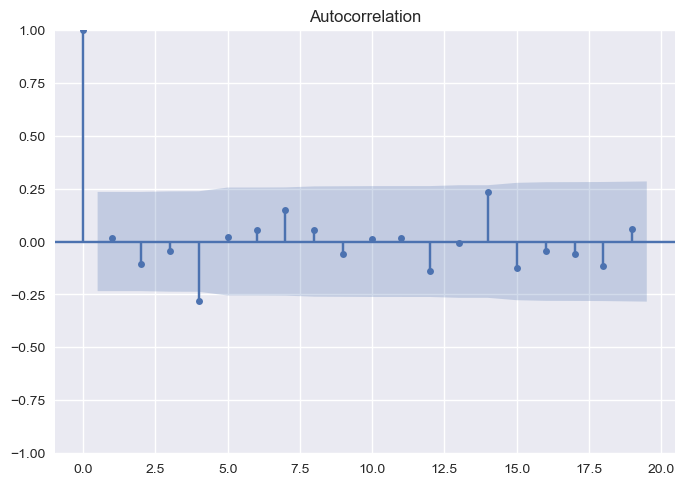

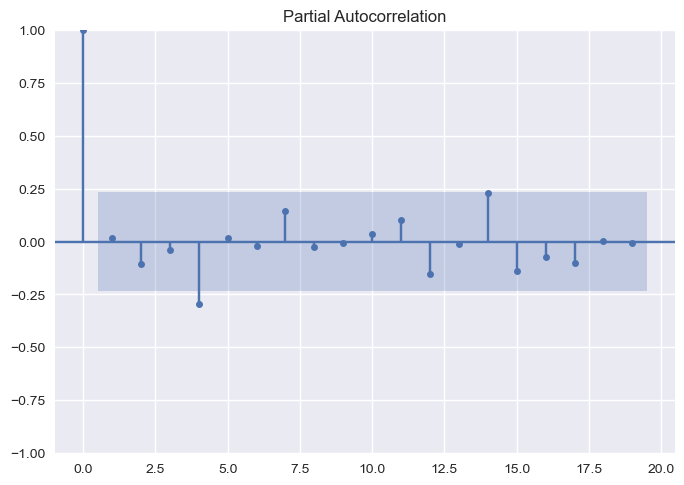

In [394]:
plot_acf(model_fit.resid)
plot_pacf(model_fit.resid)
plt.show()

#### 3.1 information criteria

In [395]:
print(f"AIC:{model_fit.aic:.3f}")
print(f"BIC:{model_fit.bic:.4f}")

AIC:154.093
BIC:168.3943


#### 3.2 metrics:RMSE and MAPE

In [396]:
RMSE=np.sqrt(mse(test['GENERAL'],forecast))
print(f"RMSE :{RMSE:.3f}")

RMSE :0.999


In [397]:
model=SARIMAX(train["GENERAL"],order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit=model.fit()
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23842D+00    |proj g|=  4.00988D-01

At iterate    5    f=  1.03124D+00    |proj g|=  1.49910D-01

At iterate   10    f=  1.01796D+00    |proj g|=  8.93301D-03

At iterate   15    f=  1.01641D+00    |proj g|=  1.01282D-02

At iterate   20    f=  1.01603D+00    |proj g|=  3.07084D-03

At iterate   25    f=  1.01598D+00    |proj g|=  3.81531D-04

At iterate   30    f=  1.01597D+00    |proj g|=  1.81655D-03

At iterate   35    f=  1.01597D+00    |proj g|=  3.42752D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/opt/anaconda3/envs/datas/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


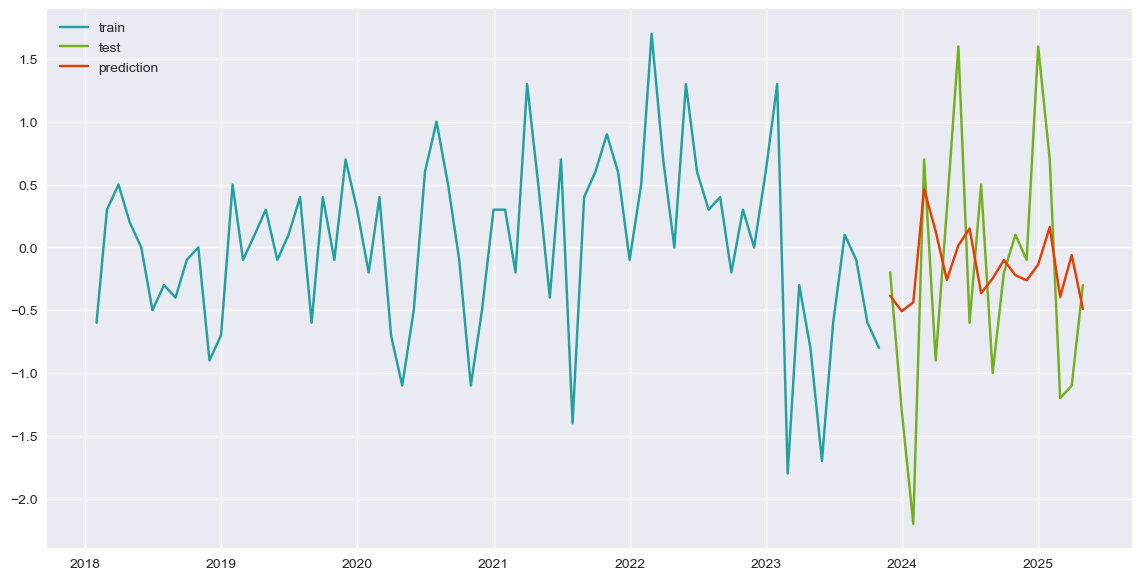

In [398]:
forecast=model_fit.forecast(steps=len(test))
plt.figure(figsize=(14,7))
plt.plot(train.index,train["GENERAL"],label="train",color="#21A0A0")
plt.plot(test.index,test["GENERAL"],label="test",color="#72B01D")
plt.plot(test.index,forecast,label="prediction",color="#E53D00")
plt.legend()
plt.show()

In [399]:
print(f"AIC:{model_fit.aic:.3f}")
print(f"BIC:{model_fit.bic:.4f}")

AIC:152.236
BIC:162.4513


In [400]:
RMSE_SARIMA=np.sqrt(mse(test['GENERAL'],forecast))
print(f"RMSE :{RMSE_SARIMA:.3f}")

RMSE :0.907


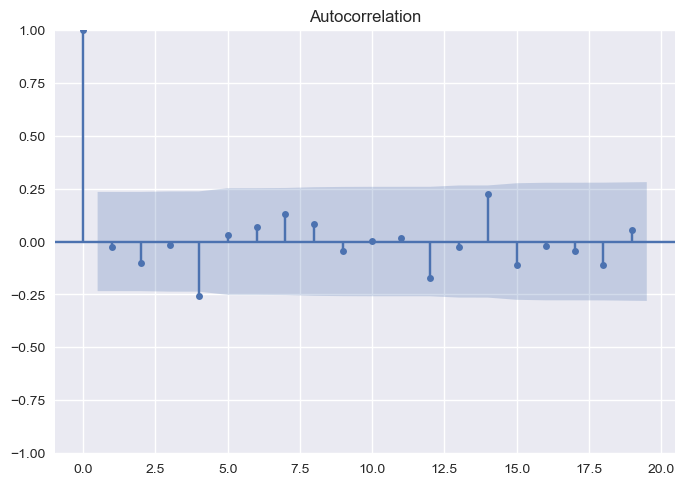

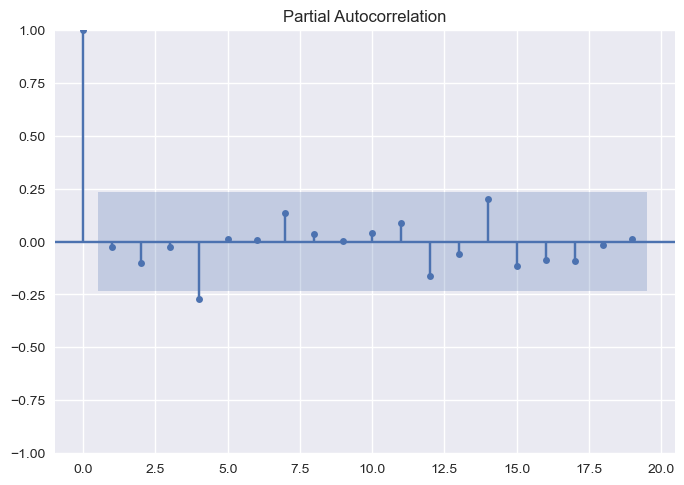

In [401]:
plot_acf(model_fit.resid)
plot_pacf(model_fit.resid)
plt.show()

#### 3.3 Ljung box test:

* Ho:les résidus sont des bruits blanc(no autocorrelation left)
* H1:les residus ne sont pas un bruit blanc(autocorrolation left)

In [402]:
result = acorr_ljungbox(model_fit.resid,lags=[10],return_df=True)
print(f"{result}")

    lb_stat  lb_pvalue
10  8.37301   0.592452


* p-value >0.05 on accepte Ho 

#### 3.4-test jaque bera

* Ho:les résidus suivent la loi normal
* H1:les résidus ne suivent pas la loi normal

* skew:symetrie au niveau de la longeur de la dispersion
* kurtosis :symetrie au niveau de la hauteur 

In [403]:
jb_stat, jb_pvalue, skew, kurtosis = jarque_bera(model_fit.resid)
print(f"JB Statistic: {jb_stat:.3f}, p-value: {jb_pvalue:.3f}")


JB Statistic: 1.692, p-value: 0.429


#### 3.4 test homoscedacite

* Ho: variance residus constante
* H1:variance des residus n'est pas constante

In [404]:
arch_test = het_arch(model_fit.resid)
print(f"ARCH Test Statistic: {arch_test[0]:.3f}, p-value: {arch_test[1]:.3f}")


ARCH Test Statistic: 13.254, p-value: 0.210


### 4.prediction sur la prochaine année:

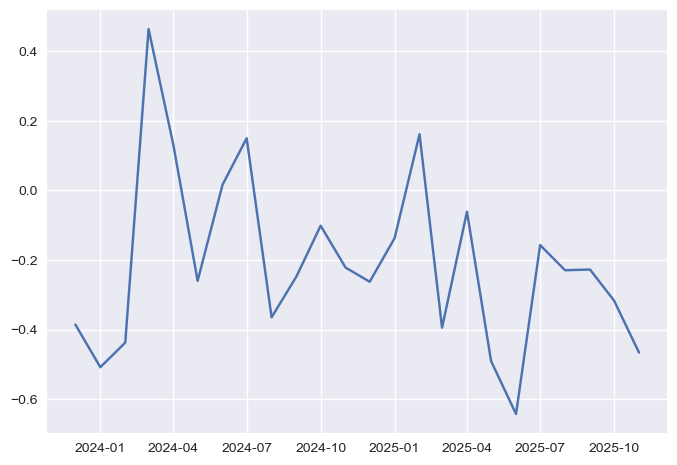

In [405]:
last_date=df_nation_diff_diff.index[-1]
forecast_steps=12
forecast=model_fit.forecast(steps=24)
plt.plot(forecast)

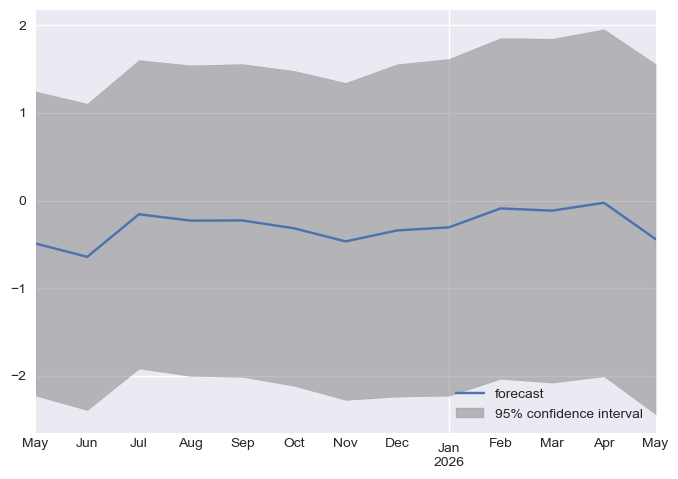

In [406]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,start="2025-05",end="2026-05")
plt.show()

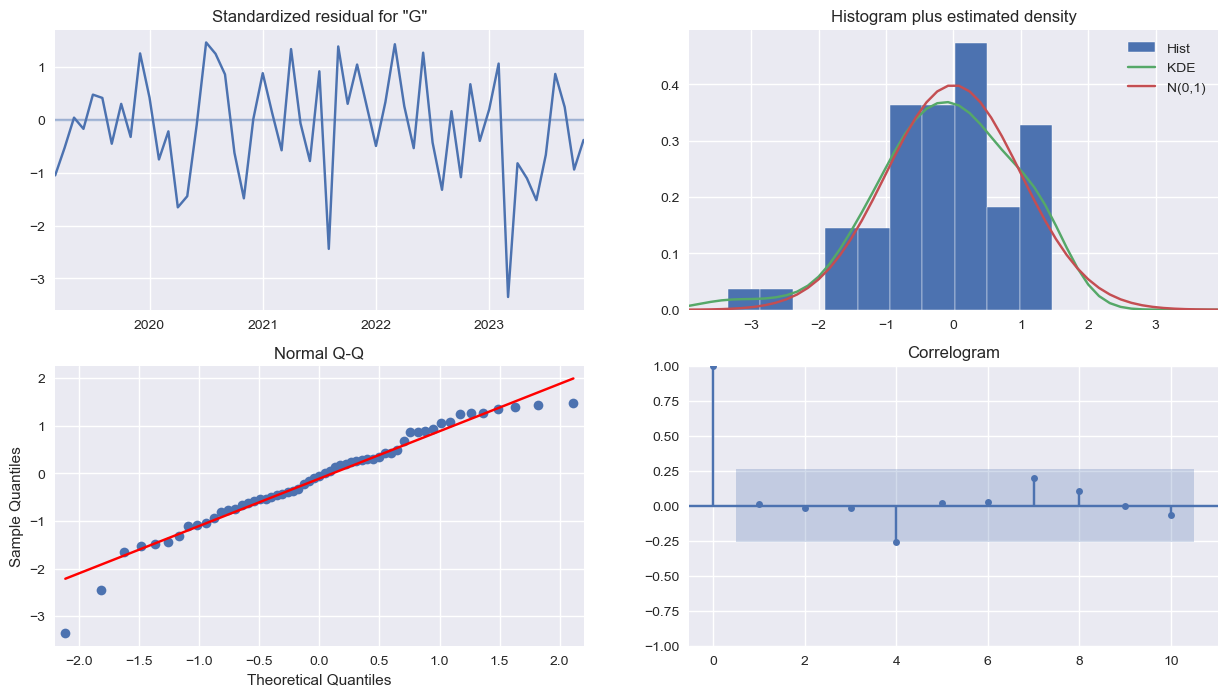

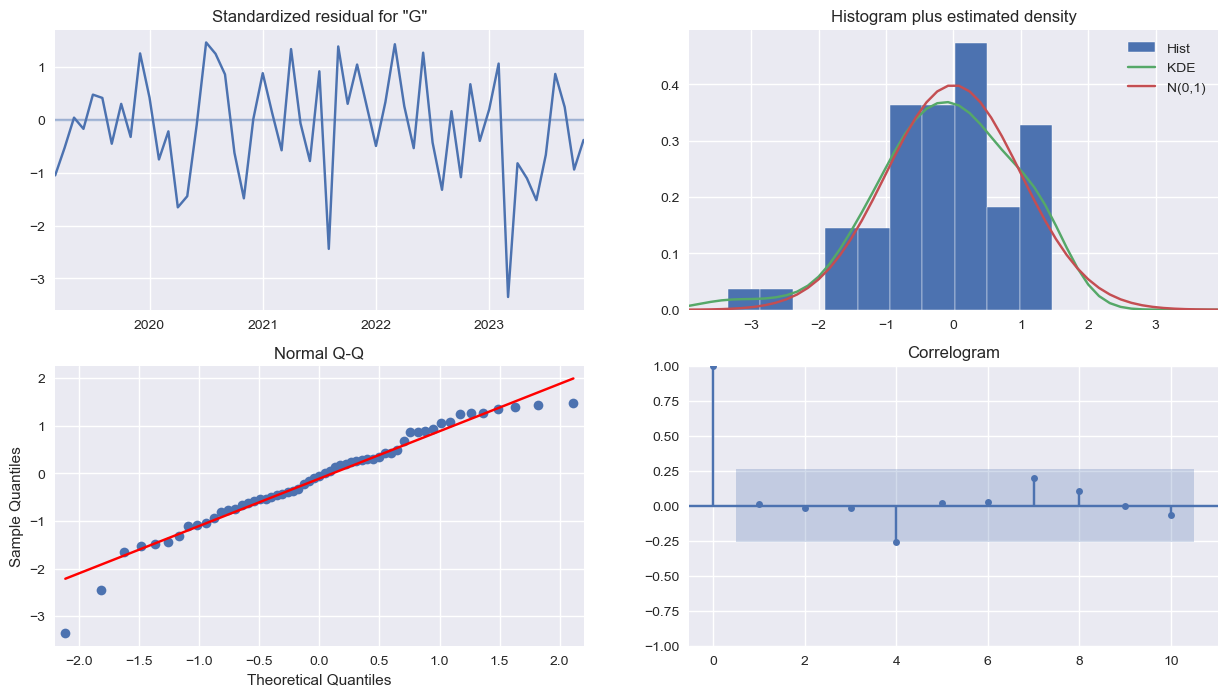

In [407]:
model_fit.plot_diagnostics(figsize=(15,8))

## 2. Exponential Smoothing

In [408]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

/opt/anaconda3/envs/datas/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


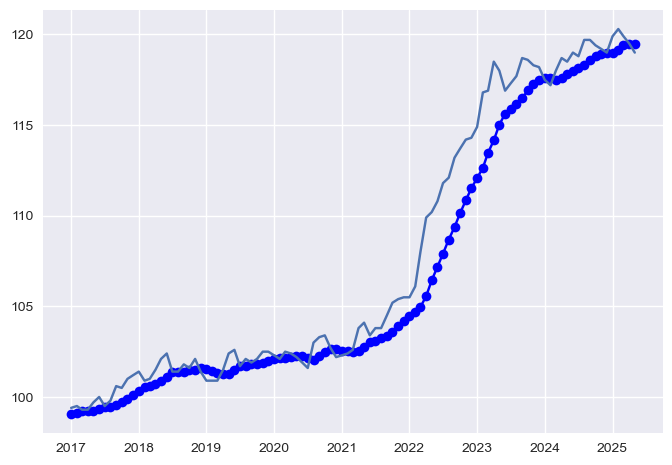

In [409]:
fit1=SimpleExpSmoothing(df_nation,initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r"$\alpha=0.2$")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
plt.plot(df_nation)

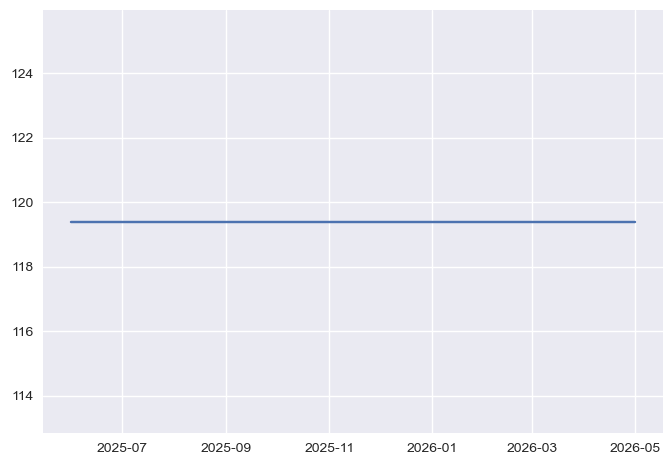

In [410]:
plt.plot(fcast1)

## 3. Holt-Winters forecasting model

In [332]:
df_nation.iloc[0]

GENERAL    99.4
Name: 2017-01-01 00:00:00, dtype: float64

In [411]:
train_size=int(len(df_nation)*0.8)
train_HW,test_HW=df_nation[:train_size],df_nation[train_size:]
print("train size:",train_size)
print("nbr des observations:",len(df_nation))

train size: 80
nbr des observations: 101


In [412]:
test_HW.index

DatetimeIndex(['2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01',
               '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

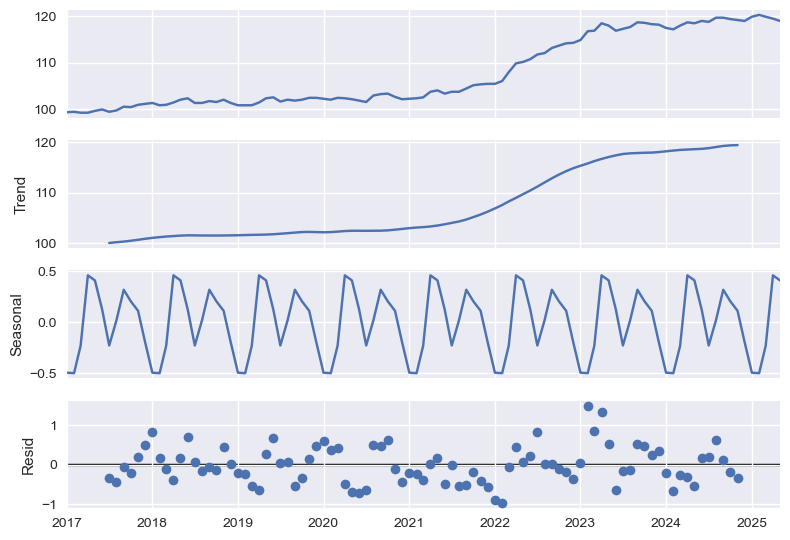

In [413]:
TSA=seasonal_decompose(df_nation).plot()

/opt/anaconda3/envs/datas/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


[]

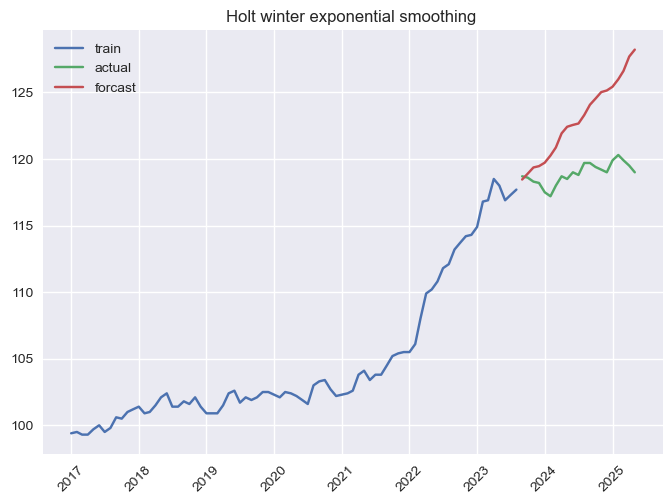

In [414]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_HW=ExponentialSmoothing(train_HW,trend='multiplicative',seasonal="additive",seasonal_periods=12).fit()
plt.plot(train_HW.index,train_HW,label="train")
plt.plot(test_HW.index,test_HW,label="actual")
plt.plot(test_HW.index,model_HW.predict(start="2023-09-01",end="2025-05-01"),label="forcast")
plt.legend()
plt.xticks(rotation=45)
plt.title("Holt winter exponential smoothing ")
plt.plot()



### validation du model

In [415]:
print(model_HW.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  GENERAL   No. Observations:                   80
Model:             ExponentialSmoothing   SSE                             21.329
Optimized:                         True   AIC                            -73.755
Trend:                   Multiplicative   BIC                            -35.643
Seasonal:                      Additive   AICC                           -62.542
Seasonal Periods:                    12   Date:                 Sun, 13 Jul 2025
Box-Cox:                          False   Time:                         20:48:10
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

#### calculate RMSE

In [418]:
prediction_HW=model_HW.predict(start="2023-09-01",end="2025-05-01")
RMSE_Holt_winters=np.sqrt(mse(test_HW,prediction_HW))
print(f"RMSE:{RMSE_Holt_winters:.3f}")

RMSE:4.725
